<a href="https://colab.research.google.com/github/Chaitanya1436/Student_Performance_Analysis/blob/main/2_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cross-validation is a statistical method used to estimate the performance of machine learning models. It is a method for assessing how the results of a statistical analysis will generalize to an independent data set. Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, failing to generalize a pattern.

6 most commonly used cross-validation techniques along with their pros and cons.

1.Hold Out Cross-validation
2. K-Fold cross-validation
3. Stratified K-Fold cross-validation
4. Leave Pout Cross-validation
5. Leave One Out Cross-validation
6. Monte Carlo (Shuffle-Split)


CV Steps:
Divide data set at random into training and test sets.
Fit model on training set.
Test model on test set.
Compute and save fit statistic using test data (step 3).
Repeat 1 - 4 several times, then average results of all step 4.

In [34]:
## Creating Random Samples
import random
li=random.sample(range(40, 150), 45)

1. HoldOut Cross-validation or Train-Test Split


In this technique of cross-validation, the whole dataset is randomly partitioned into a training set and validation set. Using a rule of thumb nearly 70% of the whole dataset is used as a training set and the remaining 30% is used as the validation set.

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris=load_iris()
X=iris.data[li]
Y=iris.target[li]
print("Size of Dataset {}".format(len(X)))




Size of Dataset 45


In [36]:
logreg=LogisticRegression()

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)

In [37]:
print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Accuracy score on training set is 1.0
Accuracy score on test set is 1.0


2. K-Fold Cross-Validation

In this technique of K-Fold cross-validation, the whole dataset is partitioned into K parts of equal size. Each partition is called a “Fold“.So as we have K parts we call it K-Folds. One Fold is used as a validation set and the remaining K-1 folds are used as the training set.

The technique is repeated K times until each fold is used as a validation set and the remaining folds as the training set.

The final accuracy of the model is computed by taking the mean accuracy of the k-models validation data.

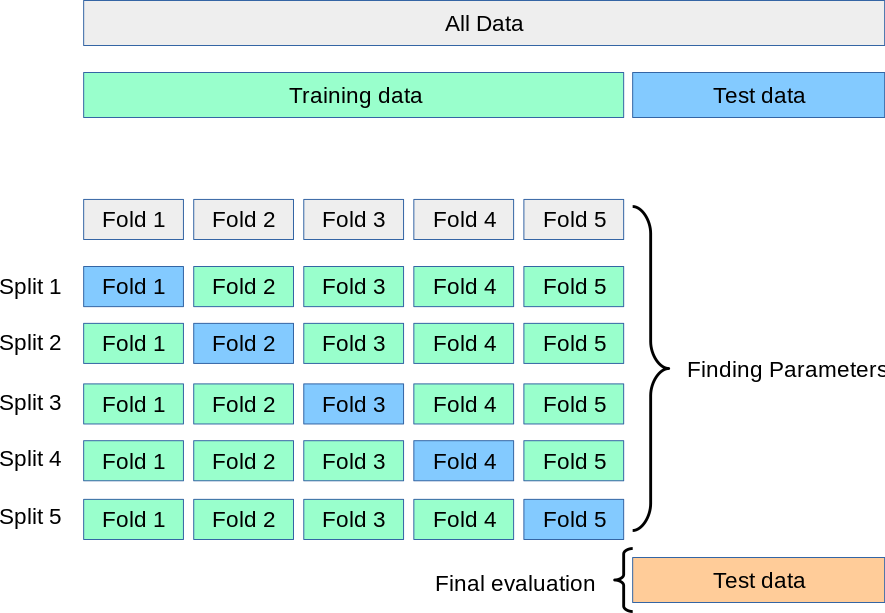

Pros: The whole dataset is used as both a training set and validation set.

Cons: Not to be used for imbalanced datasets: As discussed in the case of HoldOut cross-validation, in the case of K-Fold validation too it may happen that all samples of training set will have no sample form class “1” and only of class “0”.And the validation set will have a sample of class “1”.

Not suitable for Time Series data:  For Time Series data the order of the samples matter. But in K-Fold Cross-Validation, samples are selected in random order.

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

iris=load_iris()

X=iris.data[li]
Y=iris.target[li]



In [39]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)

In [40]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         1.         1.         0.88888889]
Average Cross Validation score :0.9777777777777779


3. Stratified K-Fold Cross-Validation

Stratified K-Fold is an enhanced version of K-Fold cross-validation which is mainly used for imbalanced datasets. Just like K-fold, the whole dataset is divided into K-folds of equal size.

But in this technique, each fold will have the same ratio of instances of target variable as in the whole datasets

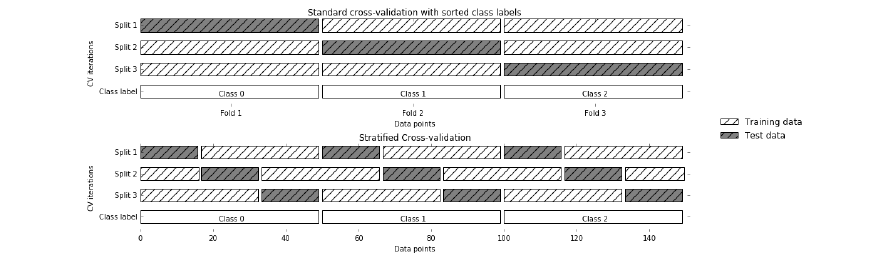

Pros: Works perfectly well for Imbalanced Data

Cons: Not suitable for Time Series data: For Time Series data the order of the samples matter. But in Stratified Cross-Validation, samples are selected in random order.

In [41]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression

iris=load_iris()
X=iris.data[li]
Y=iris.target[li]

logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=5)

score=cross_val_score(logreg,X,Y,cv=stratifiedkf)

In [42]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         1.         1.         0.88888889]
Average Cross Validation score :0.9777777777777779


4. Leave P Out cross-validation

LeavePOut cross-validation is an exhaustive cross-validation technique, in which p-samples are used as the validation set and remaining n-p samples are used as the training set.

Suppose we have 100 samples in the dataset. If we use p=10 then in each iteration 10 values will be used as a validation set and the remaining 90 samples as the training set.

This process is repeated till the whole dataset gets divided on the validation set of p-samples and n-p training samples.

Pros: All the data samples get used as both training and validation samples.

Cons: High computation time

Not Suitable for Imbalanced dataset

In [44]:
from sklearn.model_selection import LeavePOut,cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris=load_iris()
X=iris.data[li]
Y=iris.target[li]

lpo=LeavePOut(p=2)
lpo.get_n_splits(X)

tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)

score=cross_val_score(tree,X,Y,cv=lpo)

In [45]:
print("Cross Validation Scores are \n{}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are 
[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.5 0.5 1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.

5. Leave One Out cross-validation

LeaveOneOut cross-validation is an exhaustive cross-validation technique in which 1 sample point is used as a validation set and the remaining n-1 samples are used as the training set.

Suppose we have 100 samples in the dataset. Then in each iteration 1 value will be used as a validation set and the remaining 99 samples as the training set. Thus the process is repeated till every sample of the dataset is used as a validation point.

It is the same as LeavePOut cross-validation with p=1.




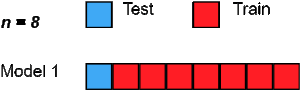




In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut,cross_val_score

iris=load_iris()
X=iris.data[li]
Y=iris.target[li]

loo=LeaveOneOut()
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,Y,cv=loo)

In [47]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross Validation score :0.9777777777777777


6. Monte Carlo Cross-Validation(Shuffle-Split)

Monte Carlo cross-validation, also known as Shuffle Split cross-validation, is a very flexible strategy of cross-validation. In this technique, the datasets get randomly partitioned into training and validation sets.

We have decided upon the percentage of the dataset we want to be used as a training set and the percentage to be used as a validation set. If the added percentage of training and validation set size is not sum up to 100 then the remaining dataset is not used in either training or validation set.

Let’s say we have 100 samples and 60% of samples to be used as training set and 20% of the sample to be used as validation set then the remaining 20%( 100-(60+20)) is not to be used.

This splitting will be repeated ‘n’ times that we have to specify.

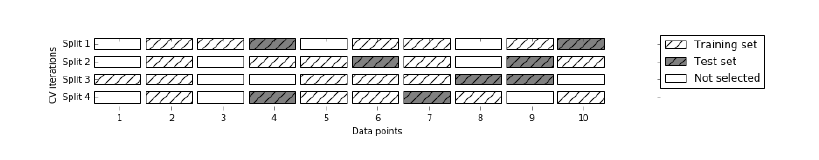


Pros:
We are free to use the size of the training and validation set.

We can choose the number of repetitions and not depend on the number of folds for repetitions.

Cons: Few samples may not be selected for either training or validation set.

Not Suitable for Imbalanced datasets:

In [48]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)

scores=cross_val_score(logreg,iris.data[li],iris.target[li],cv=shuffle_split)

In [49]:
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.85714286 1.         1.         1.         1.         1.
 1.         1.         1.         0.92857143]
Average Cross Validation score :0.9785714285714286
